In [1]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [81]:
adata = scv.read('gbm.h5ad')

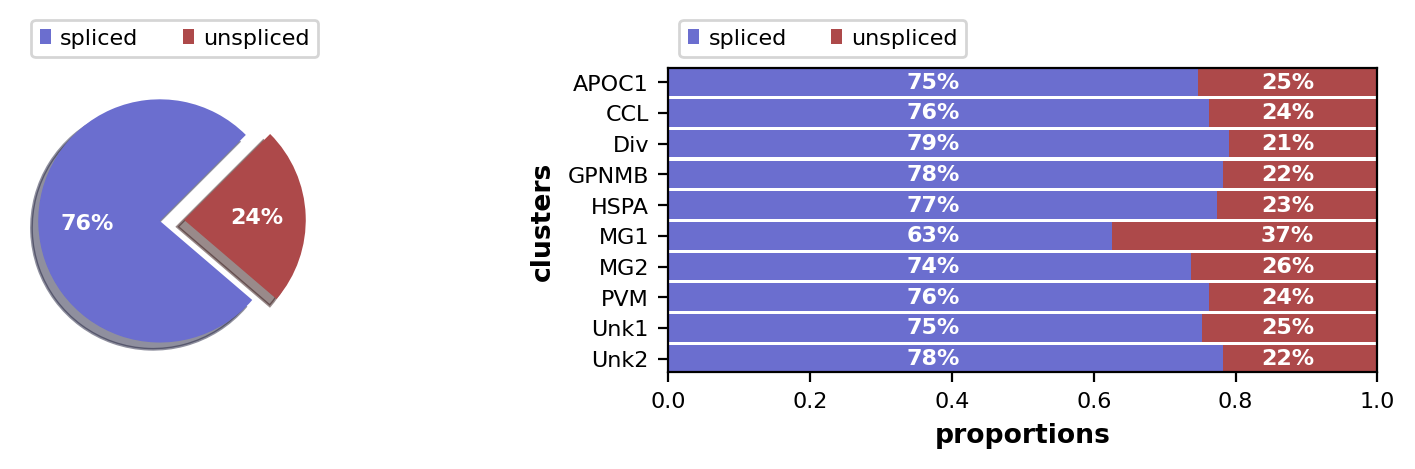

In [82]:
adata.obs['clusters'] = adata.obs['clusters'].astype('category')
scv.pl.proportions(adata, groupby='clusters')

In [83]:
scv.pp.filter_genes(adata)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata)
scv.pp.log1p(adata)

Normalized count data: X, spliced, unspliced.
Extracted 3957 highly variable genes.


computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


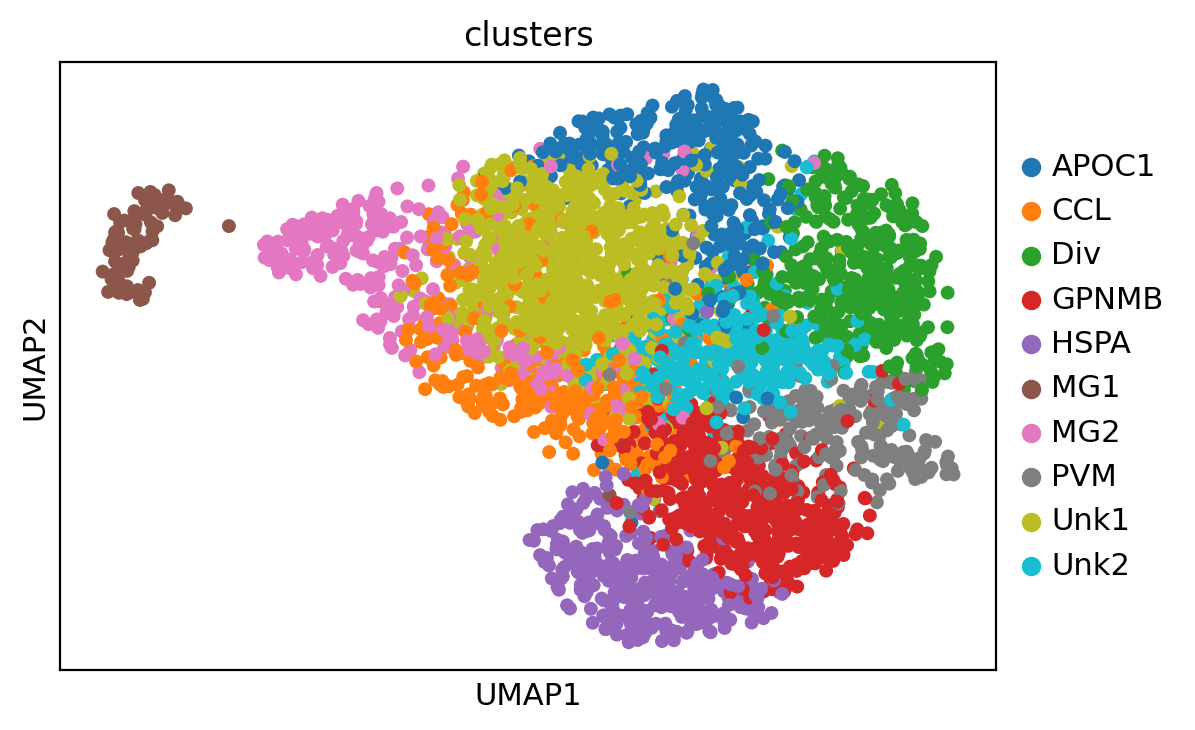

In [85]:
#scv.pp.moments(adata, n_pcs=30)
sc.tl.umap(adata, min_dist=.9, spread = 1)
sc.pl.umap(adata, color=['clusters'], size=100)

In [86]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)


  0%|          | 0/806 [00:00<?, ?gene/s]

    finished (0:00:14) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


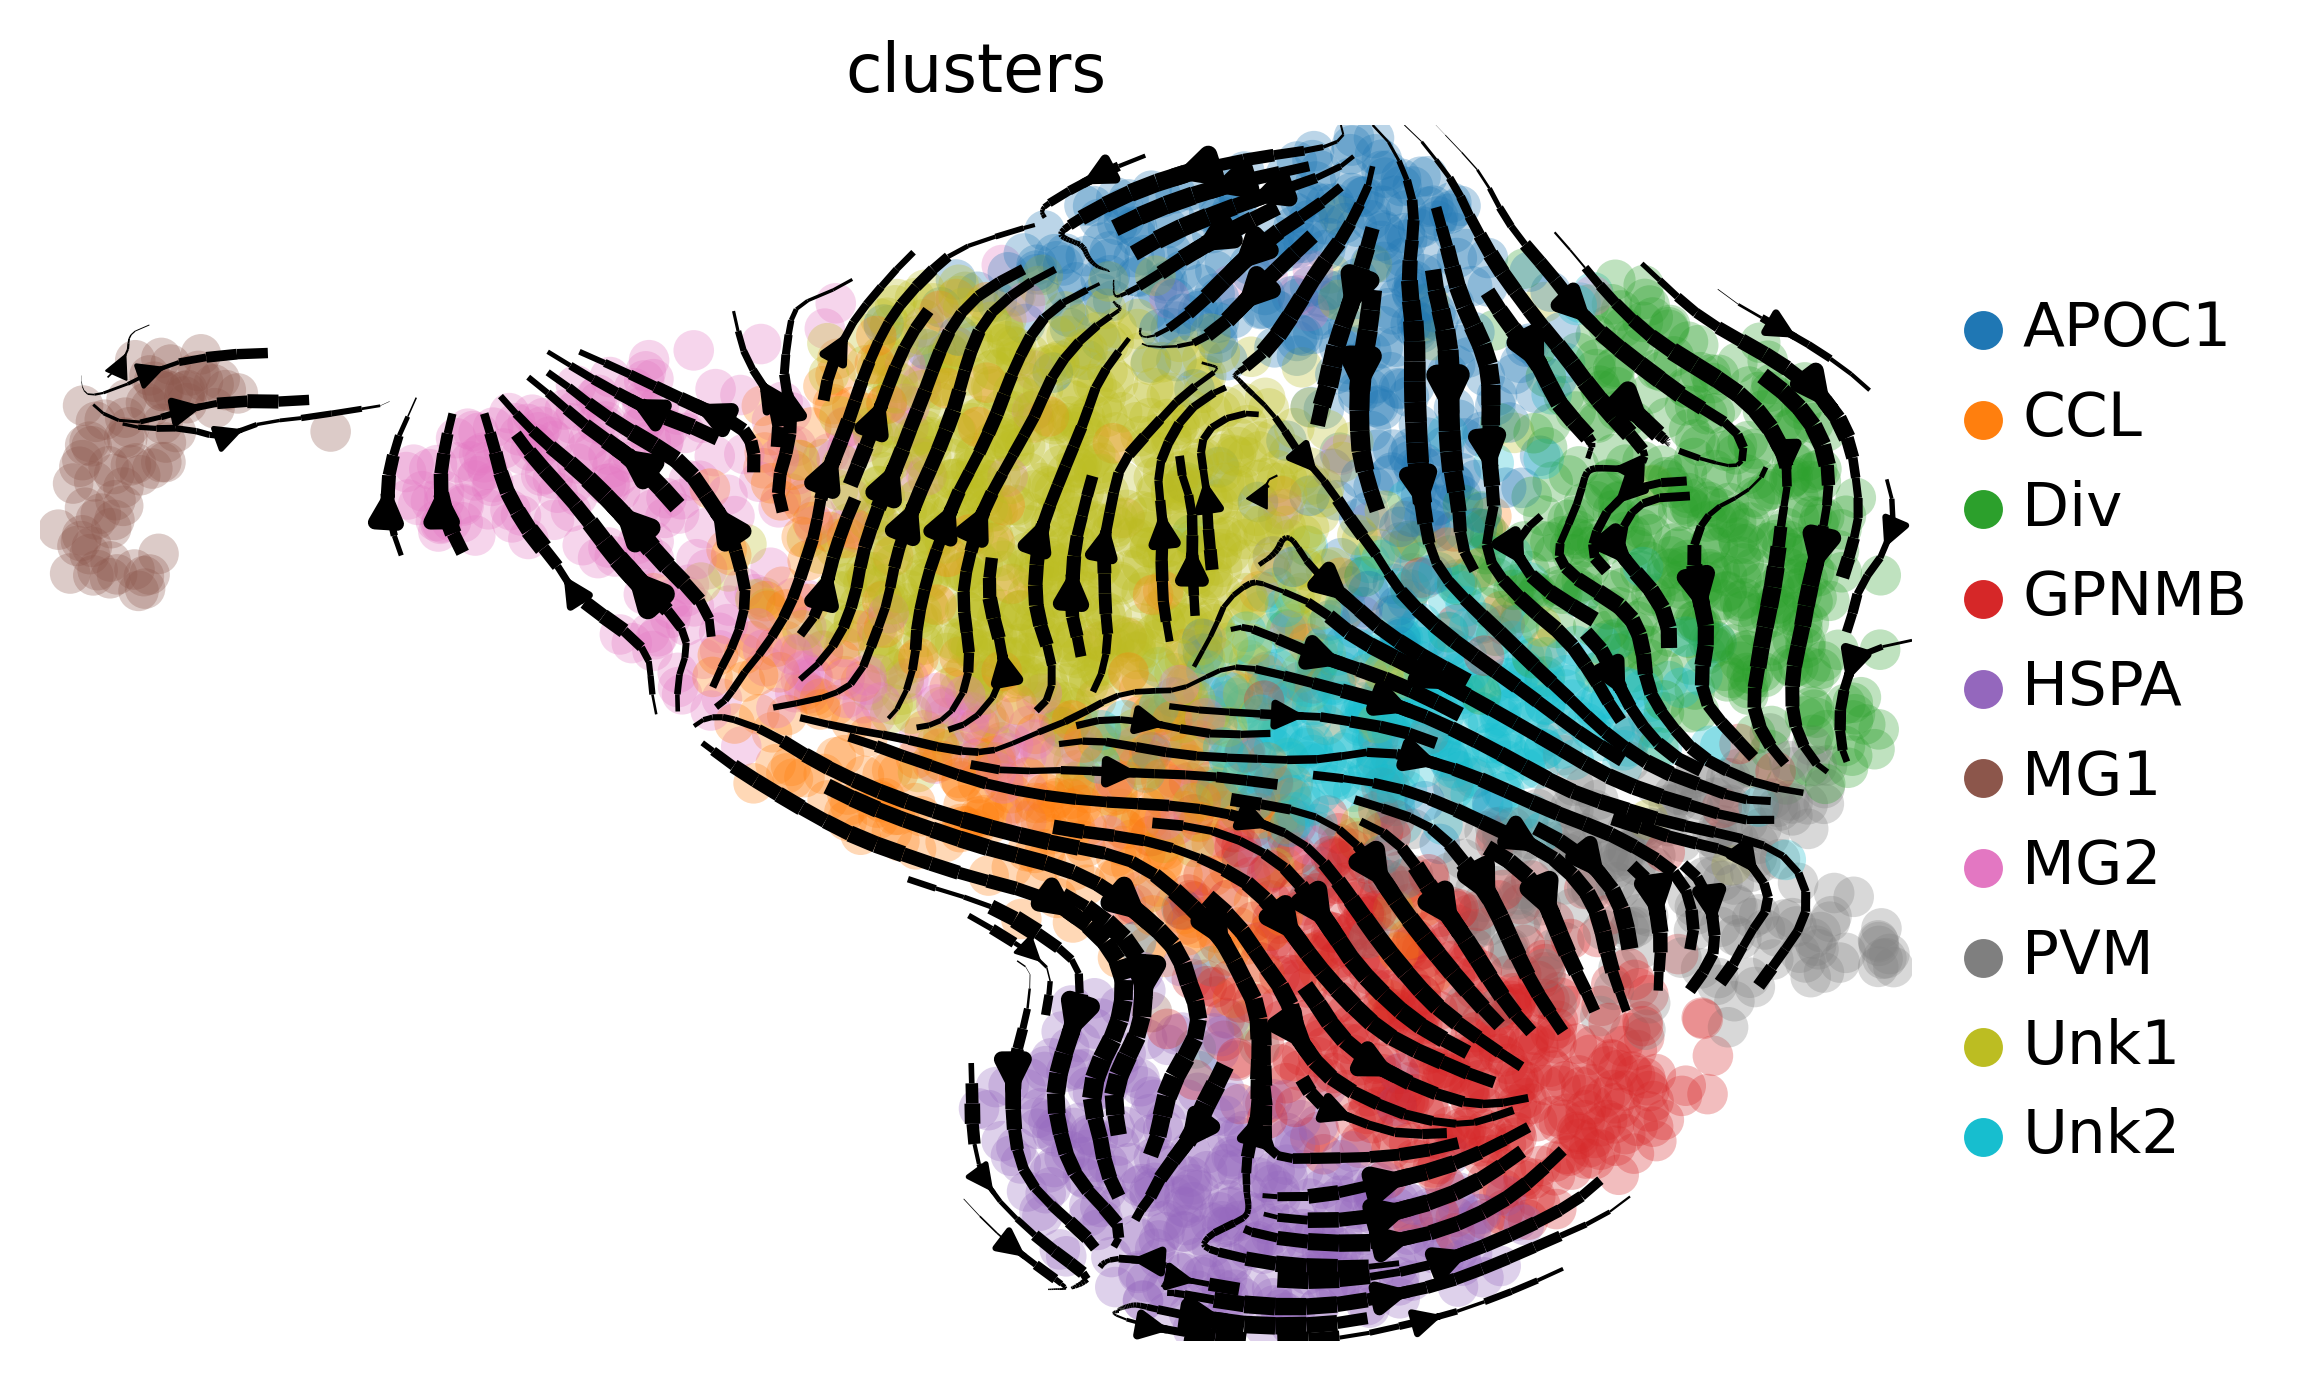

In [87]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=200, linewidth=2, color='clusters')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


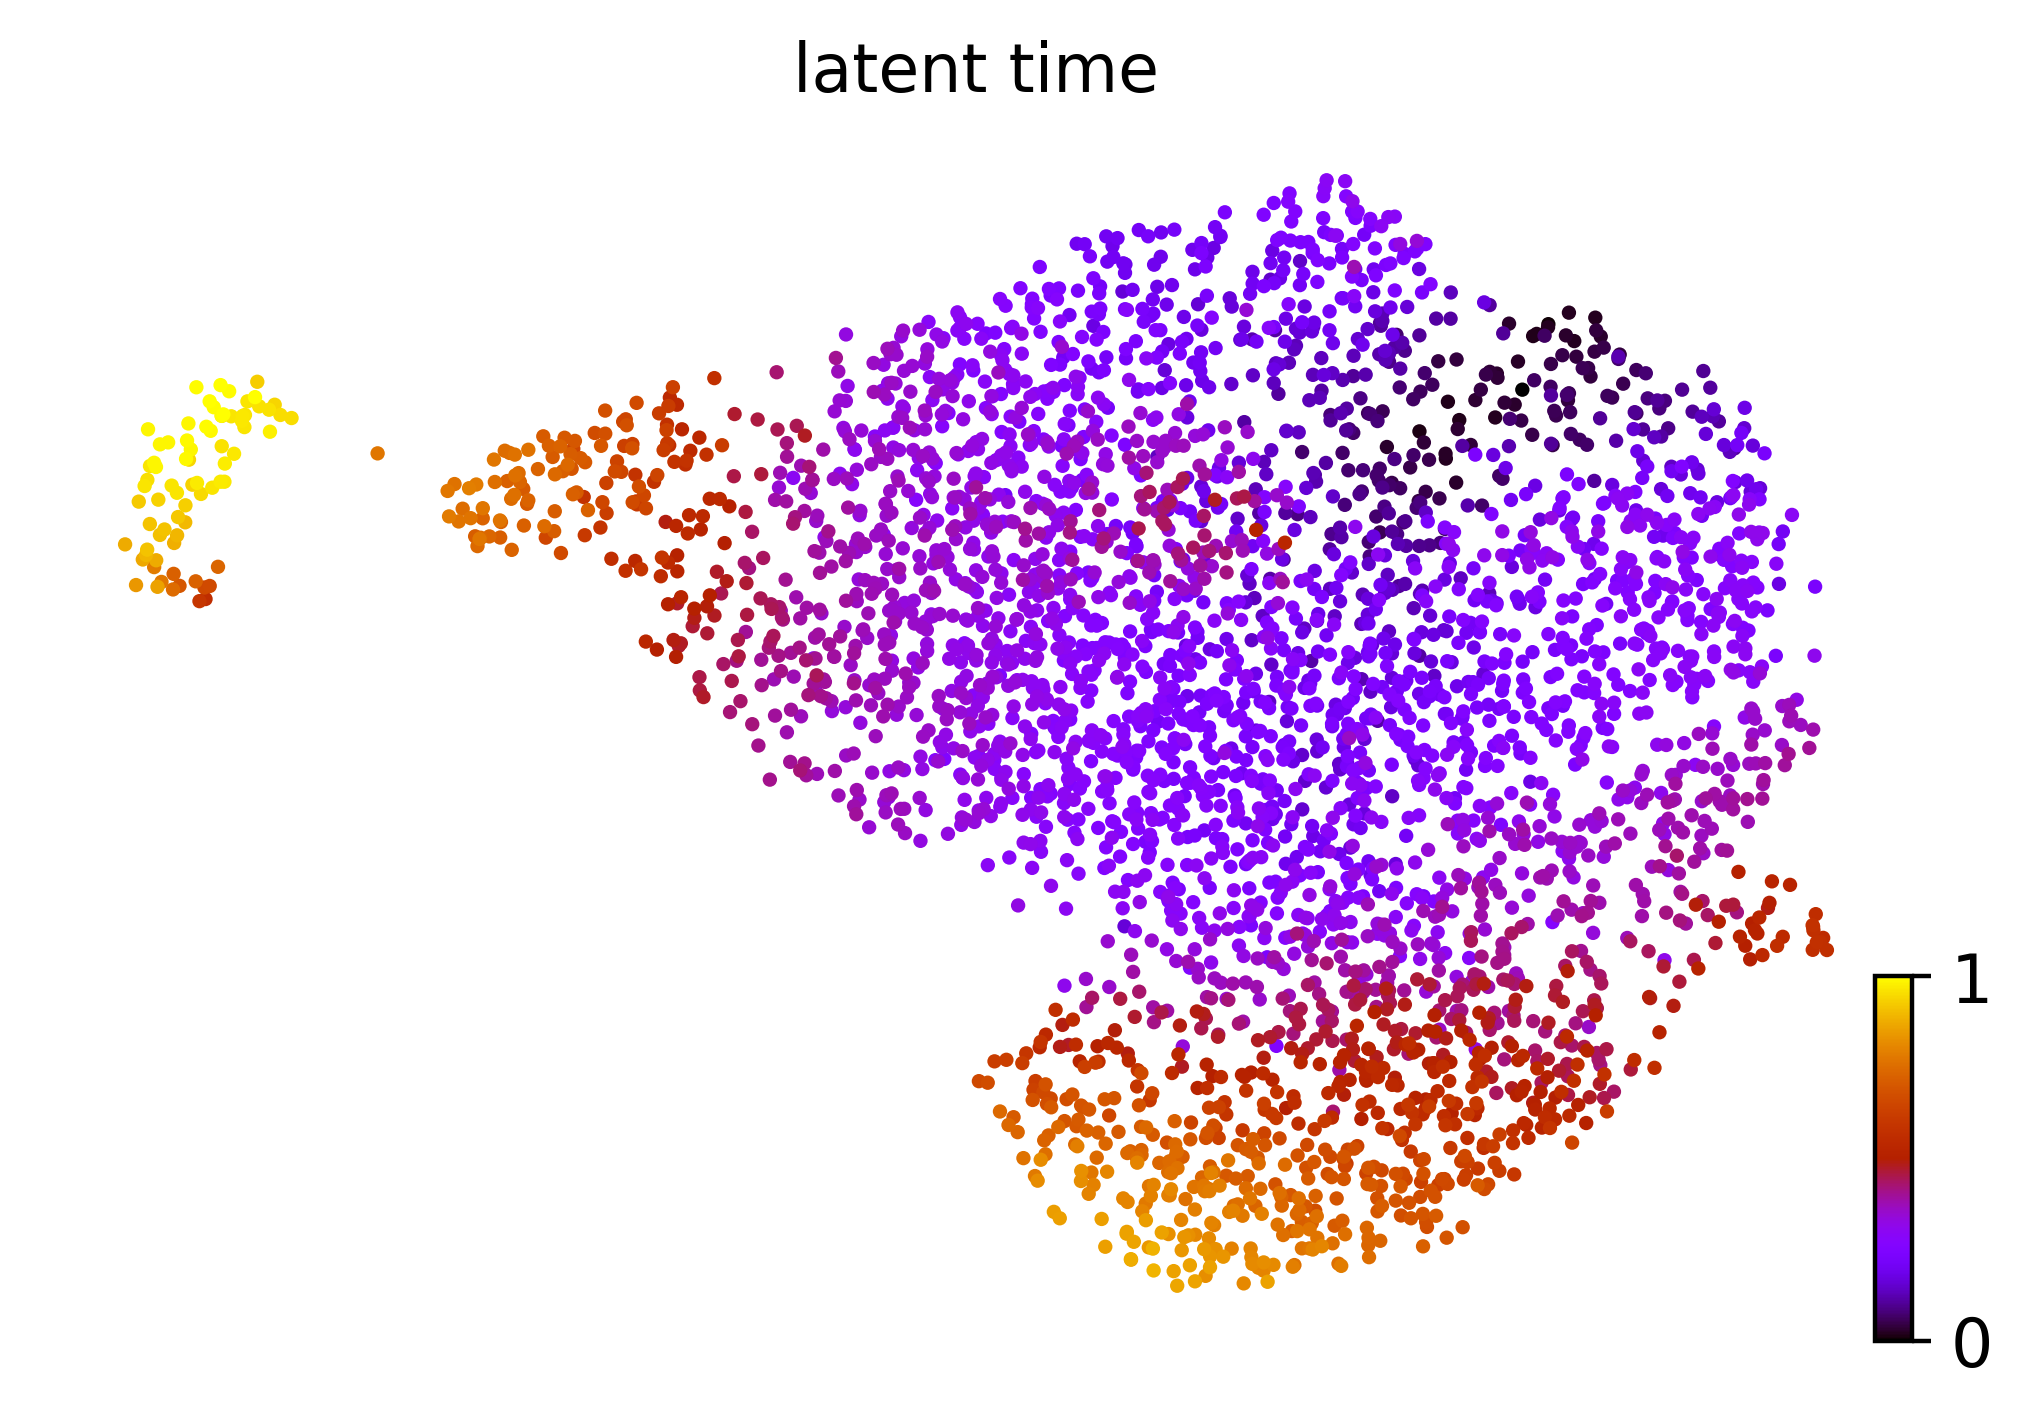

In [92]:
#scv.tl.latent_time(adata)
#scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', dpi=200)

In [88]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

testing for differential kinetics
    finished (0:00:07) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pval_kinetics', p-values of differential kinetics (adata.var)


In [89]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


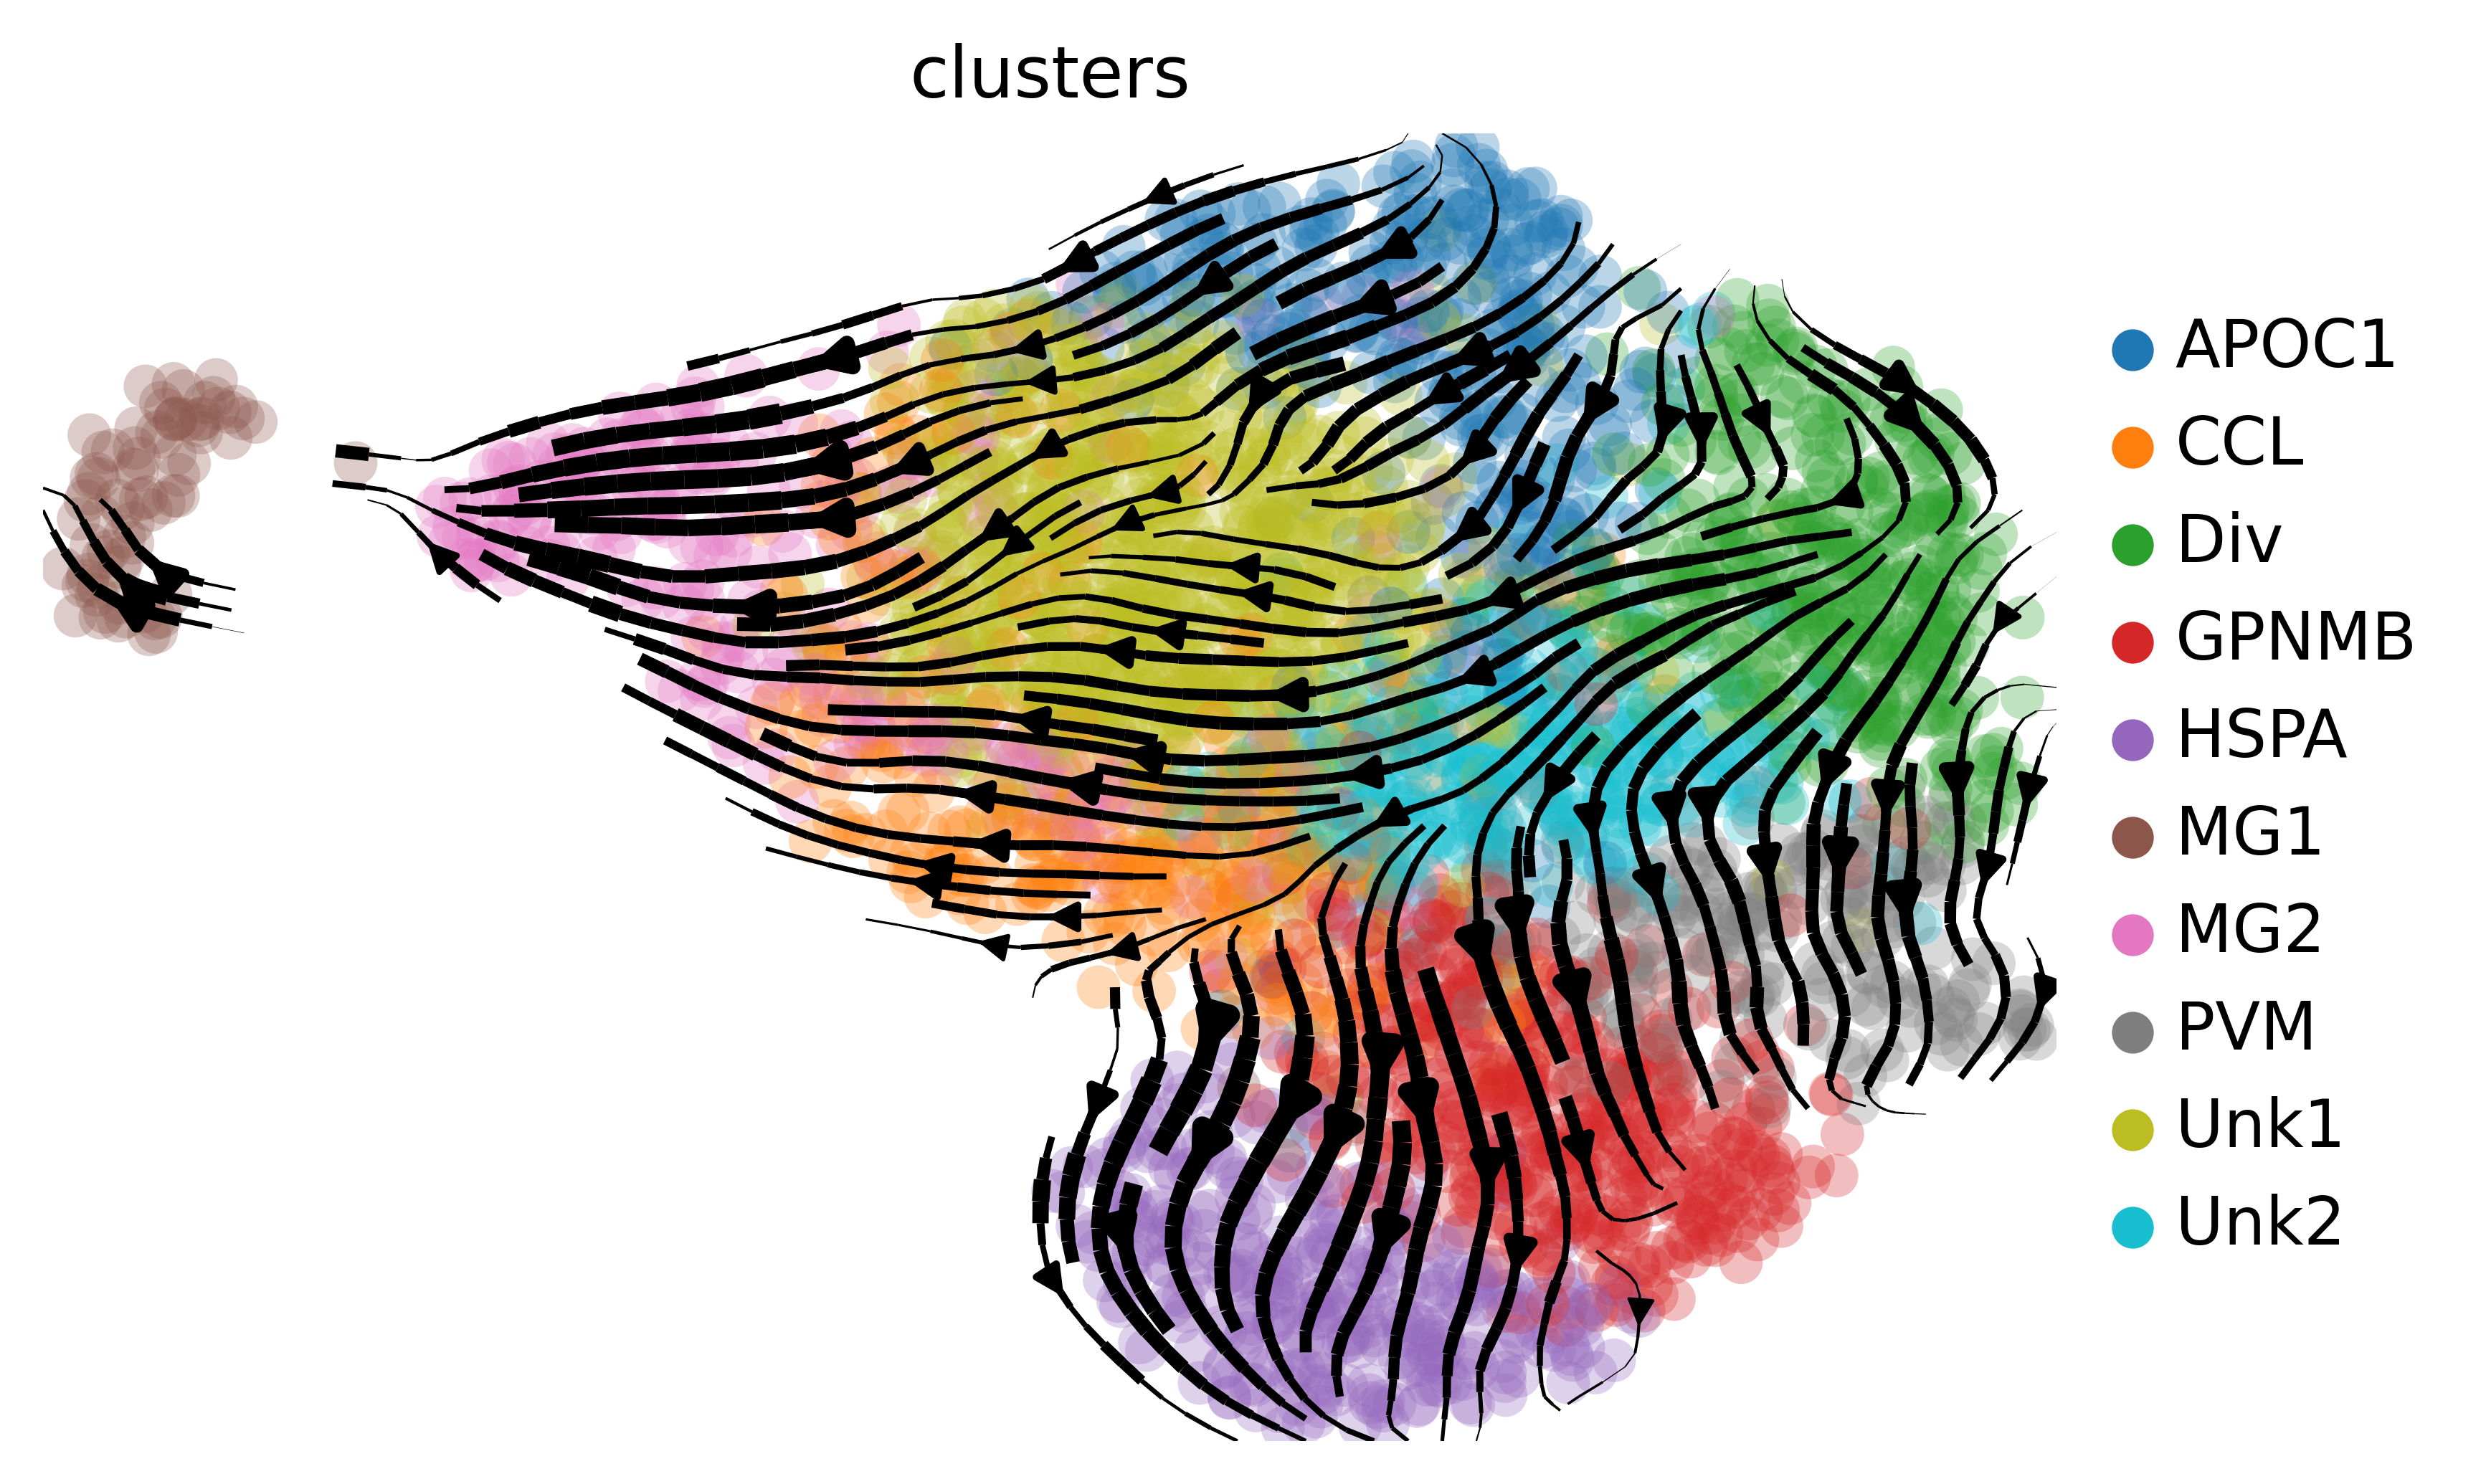

In [90]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2, color='clusters')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

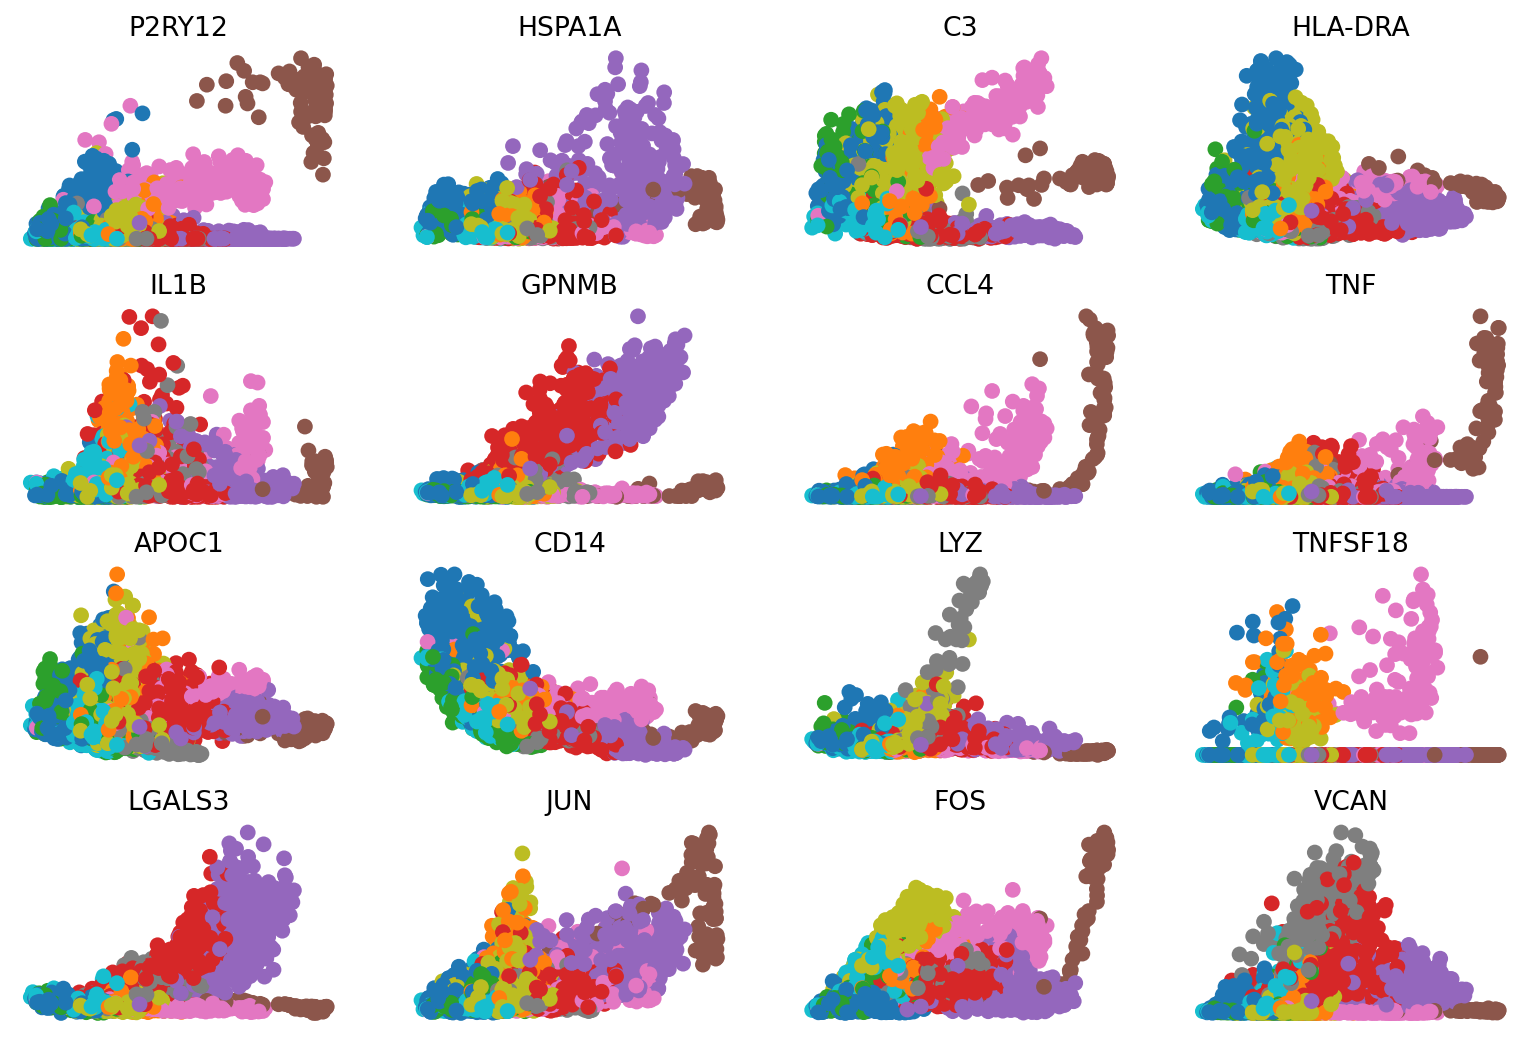

In [119]:
scv.pl.scatter(adata, x='latent_time', y=['P2RY12',"HSPA1A",'C3','HLA-DRA','IL1B',"GPNMB","CCL4",'TNF',"APOC1","CD14","LYZ","TNFSF18","LGALS3",'JUN',"FOS","VCAN"], ncols=4,frameon=False, size=200)

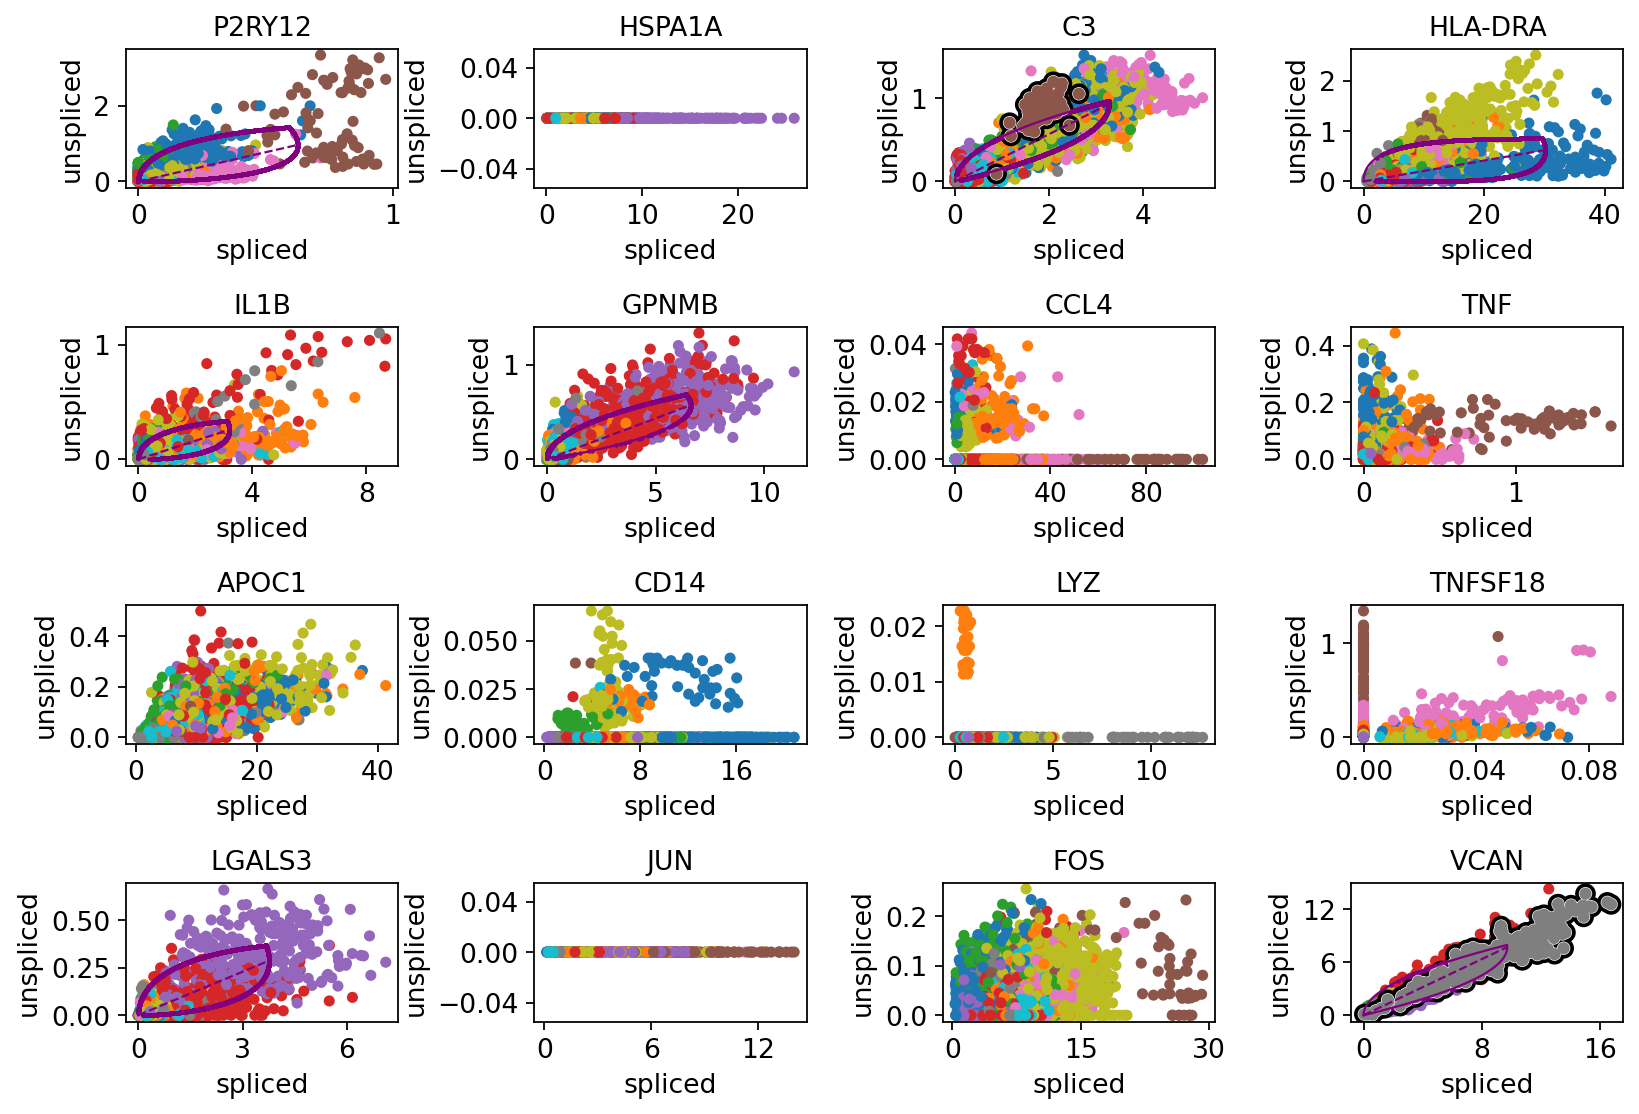

In [124]:
scv.pl.scatter(adata, basis=['P2RY12',"HSPA1A",'C3','HLA-DRA','IL1B',"GPNMB","CCL4",'TNF',"APOC1","CD14","LYZ","TNFSF18","LGALS3",'JUN',"FOS","VCAN"],
               ncols=4, add_outline='fit_diff_kinetics', hspace=1,wspace=.5, size=100)